# EA614 - Análises de Sinais
## EFC5 - Transformada Discreta de Fourier
### Bryan Wolff - RA: 214095



## Bibliotecas Utilizadas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

## Questão A - *Gerando a sequência x[n]*

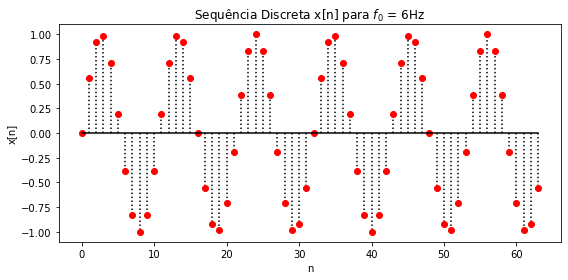

In [ ]:
f0 = 6    #Frequência fundamental
N = 64    #Número de amostras
fs = 64   #Frequência de amostragem

n = [x for x in range(0,N,1)]
x_n = [np.sin(2*np.pi*(f0/fs)*i) for i in range(N)]

#Gráfico de x[n]
plt.figure(figsize=[9,4])
plt.title("Sequência Discreta x[n] para $f_0$ = 6Hz")
plt.xlabel("n")
plt.ylabel("x[n]")
plt.stem(n, x_n, linefmt = (':','k'), markerfmt = ('o','r'), basefmt = 'k', use_line_collection = True)
plt.show()

## Questão B - *Transformada de Fourier $X(e^{jΩ})$ associada à x[n]*


Sabemos que:

$X(e^{j\Omega})$ = $F${ x[n] } = $F${$sen(\omega_0n)\cdot\omega_N[n]$} = $\frac{1}{2\pi}\cdot F${$sen(\omega_0n)$}$*F${$\omega_N[n]$}

A partir de valores já tabelados para cada uma das funções acima temos:

*   $F${$sen(\omega_0n)$} = $\frac{\pi}{j}\cdot [\delta(\Omega - \omega_0) - \delta(\Omega + \omega_0)]$ com $\omega_0 = 2\pi\cdot\frac{f_0}{f_s}$ ;
*   $F${$\omega_N[n]$} = Transformada de Fourier de um pulso retangular deslocado de $\frac{N-1}{2}$ \\
ou, de maneira análoga, a Transformada de Fourier de $u[n] - u[n-N]$: \\
∴ $F${$\omega_N[n]$} = $\frac{sen(N\cdot\frac{\Omega}{2})}{sen(\frac{\Omega}{2})}\cdot e^{-j\cdot(\frac{N-1}{2})\cdot\Omega}$ .

Dessa forma, obtemos a seguinte expressão:

$X(e^{j\Omega})$ = $\frac{1}{2\pi}\cdot${$\frac{\pi}{j}\cdot [\delta(\Omega - \omega_0) - \delta(\Omega + \omega_0)]*[\frac{sen(N\cdot\frac{\Omega}{2})}{sen(\frac{\Omega}{2})}\cdot e^{-j\cdot(\frac{N-1}{2})\cdot\Omega}]$} $\Rightarrow$

$\Rightarrow$ $X(e^{j\Omega})$ = $\frac{j}{2}\cdot[\frac{sen(\frac{N}{2}\cdot(\Omega+\omega_0))}{sen(\frac{1}{2}\cdot(\Omega+\omega_0))}\cdot e^{-j\cdot(\frac{N-1}{2})\cdot(\Omega+\omega_0)}-\frac{sen(\frac{N}{2}\cdot(\Omega-\omega_0))}{sen(\frac{1}{2}\cdot(\Omega-\omega_0))}\cdot e^{-j\cdot(\frac{N-1}{2})\cdot(\Omega-\omega_0)}]$

e, portanto:

$X(e^{j\Omega})$ = $\frac{j}{2}\cdot[\frac{sen(\frac{N}{2}\cdot(\Omega+2\pi\frac{f_0}{f_s}))}{sen(\frac{1}{2}\cdot(\Omega+2\pi\frac{f_0}{f_s}))}\cdot e^{-j\cdot(\frac{N-1}{2})\cdot(\Omega+2\pi\frac{f_0}{f_s})}-\frac{sen(\frac{N}{2}\cdot(\Omega-2\pi\frac{f_0}{f_s}))}{sen(\frac{1}{2}\cdot(\Omega-2\pi\frac{f_0}{f_s}))}\cdot e^{-j\cdot(\frac{N-1}{2})\cdot(\Omega-2\pi\frac{f_0}{f_s})}]$

## Questão C - *DFT da sequência x[n]*

Como os sinais em questão são reais, podemos analisar apenas a faixa de frequências de 0 a π, ou seja, de 0 a N/2. Isso se dá por conta da simetria par do módulo da resposta em frequência. Ao análisar o gráfico, obtido, é possivel perceber que o gráfico em sua grande parte apresenta valores nulos, com excessao um valor de pico no ponto correspondente à frequência fundamental do sinal x[n] ($\Omega = 2\pi\frac{f_0}{f_s}\approx 0.58$) que lembra uma função de impulso unitário. 

Além disso, para um grande número de amostras, o comportamente do espectro da função $|X(j\omega)|$ também se aproxima de um impulso unitário localizado no ponto referente à esta frequência fundamental. Vale ressaltar que este comportamento corresponde ao espectro de uma senoide pura no domínio da frequência.

Analisando agora a função $|X(e^{j\Omega})|$, é possível perceber que apesar da correspondência dos pontos nulos e do pico, não há amostras suficientes que demonstrem semelhanças com o espectro da DFT além destas pontuadas, devido a função contínua apresentar vários outros picos.



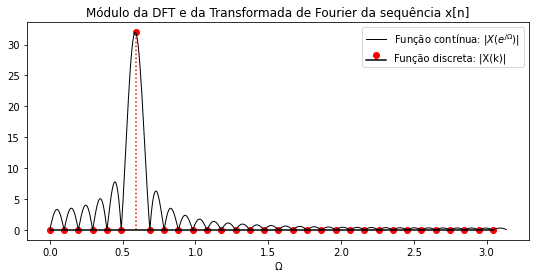

In [ ]:
DFT_N_amostras = abs(np.fft.fft(x_n, N))    #DFT da sequência x[n] para N amostras
omega = [2*np.pi*(i/N) for i in range(0,N-1,1)]   #Escala de frequências

#Transformada de Fourier da sequência x[n]
Ω,XΩ = signal.freqz(x_n)
XΩ = abs(XΩ)

#Podemos analisar apenas a faixa de frequências de 0 a π (0 a N/2). 
plt.figure(figsize=[9,4])
plt.stem(omega[0:32], DFT_N_amostras[0:32], linefmt = (':','r'), \
         markerfmt = ('o','r'), basefmt = 'k', label = "Função discreta: |X(k)|", use_line_collection = True)

plt.plot(Ω,XΩ, label = "Função contínua: |$X(e^{jΩ})$|", color = "k", linewidth = 1)
plt.title("Módulo da DFT e da Transformada de Fourier da sequência x[n]")
plt.xlabel("Ω")
plt.legend(loc="upper right")

plt.show()

## Questão D - *DFT utilizando 2N pontos*



Analisando o gráfico, é notável que ao aumentar o número de amostras o espectro da função $|X(k)|$ passa a apresentar mais semelhanças com o espectro da função $|X(e^{j\Omega})|$, pois com 2N amostras é possível visualizar outros pontos que não são nulos, não sendo mais possível observar o comportamento de uma senoide pura no domínio da frequência com um único valor de pico.

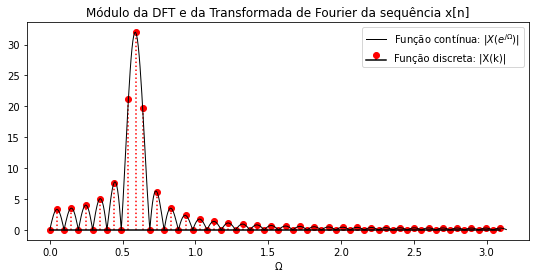

In [ ]:
N_2 = 2*N
DFT_2N_amostras = abs(np.fft.fft(x_n, N_2)) #DFT da sequência x[n] para 2N amostras
omega2N = [2*np.pi*(i/N_2) for i in range(N_2)] #Nova escala de frequências

#análogamente, podemos analisar apenas a faixa de frequências de 0 a π (0 a N). 
plt.figure(figsize=[9,4])

plt.stem(omega2N[0:N], DFT_2N_amostras[0:N], linefmt = (':','r'), markerfmt = ('o','r'),\
         basefmt = 'k', label = "Função discreta: |X(k)|", use_line_collection = True)

plt.plot(Ω,XΩ, label = "Função contínua: |$X(e^{jΩ})$|", color = "k", linewidth = 1)
plt.title("Módulo da DFT e da Transformada de Fourier da sequência x[n]")
plt.xlabel("Ω")
plt.legend(loc="upper right")

plt.show()

## Questão E - *Análise para frequência $f_0$ = 6,5 Hz*


### Gerando a sequência x[n]

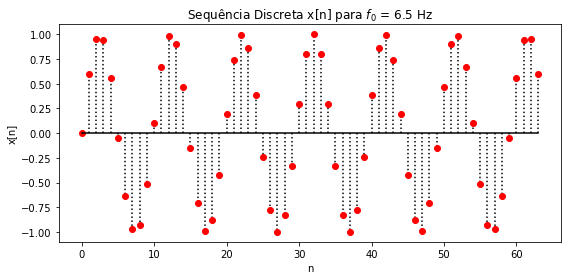

In [ ]:
f0 = 6.5  #nova frequência fundamental
x_n = [np.sin(2*np.pi*(f0/fs)*i) for i in range(0,N,1)] #Nova sequência x[n]

#gráfico de x[n]
plt.figure(figsize=[9,4])
plt.title("Sequência Discreta x[n] para $f_0$ = 6.5 Hz")
plt.xlabel("n")
plt.ylabel("x[n]")
plt.stem(n, x_n, linefmt = (':','k'), markerfmt = ('o','r'), basefmt = 'k', use_line_collection = True)
plt.show()



### DFT e Transformada de Fourier

Analisando o gráfico, ao alterar a freqência natural para $f_0$ = 6,5Hz, os valores do seno que  antes atingiam os valores nulos (por serem multiplos de $\pi$), agora atingem valores não nulos. Além disso, os valores de picos apresentam deslocados em comparação com os obtidos anteriormente, valendo ressaltar que, neste caso, não existe o comportamento de uma senoide pura como visto para anteriormente.

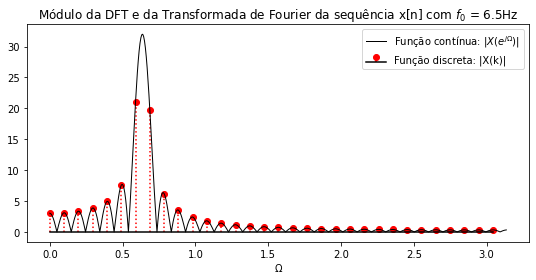

In [ ]:
DFT_novo_f0 = abs(np.fft.fft(x_n, N))   #DFT da sequência x[n] com f0 = 6.5Hz
Ω_novo_f0,XΩ_novo_f0 = signal.freqz(x_n) #Nova transformada de Fourier da sequência x[n]
XΩ_novo_f0 = abs(XΩ_novo_f0)

#Podemos analisar apenas a faixa de frequências de 0 a π (0 a N/2) 
plt.figure(figsize=[9,4])
plt.stem(omega[0:32], DFT_novo_f0[0:32], linefmt = (':','r'), markerfmt = ('o','r'),\
         basefmt = 'k', label = "Função discreta: |X(k)|", use_line_collection = True)
plt.plot(Ω_novo_f0, XΩ_novo_f0, label = "Função contínua: |$X(e^{jΩ})$|", color = "k", linewidth = 1)
plt.title("Módulo da DFT e da Transformada de Fourier da sequência x[n] com $f_0$ = 6.5Hz")
plt.xlabel("Ω")
plt.legend(loc="upper right")
plt.show()